In [6]:
#기본 library import
import torchvision
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn, optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 실습 과제 1.
Lab 0 Broadcasting: Multiply a tensor by a set of constants에서 multiplication 예제를 addition으로 수정하세요.

In [7]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
c = torch.tensor([1, 10, 11, 100])        # c has shape (4)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(c)

# We do the following:
# 1. Reshape c from (4,) to (4, 1, 1)
# 2. x has shape (2, 3). Since they have different ranks, when we multiply the
#    two, x behaves as if its shape were (1, 2, 3)
# 3. The result of the broadcast multiplication between tensor of shape
#    (4, 1, 1) and (1, 2, 3) has shape (4, 2, 3)
# 4. The result y has shape (4, 2, 3), and y[i] (shape (2, 3)) is equal to
#    c[i] * x
y = c.view(-1, 1, 1) + x
print('\naddition x by a set of constants:')
print(y)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([  1,  10,  11, 100])

addition x by a set of constants:
tensor([[[  2,   3,   4],
         [  5,   6,   7]],

        [[ 11,  12,  13],
         [ 14,  15,  16]],

        [[ 12,  13,  14],
         [ 15,  16,  17]],

        [[101, 102, 103],
         [104, 105, 106]]])


# 실습 과제 2.
Lab 1 Universal Approximation Theorem에서 L2대신 L1 regularization으로 학습시키고 결과를 비교 논의하세요.

## L2 Regularization


In [8]:
# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)

In [9]:
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.relu(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

In [ ]:
# Training setup
model = Net(hidden_size=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
y = torch.sin(x)

In [11]:
def train_model_with_regularization(model, criterion, optimizer, x, y, epochs=2000, l1_lambda=0.01):
    for epoch in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)

        # L1 Regularization
        l1_penalty = sum(p.abs().sum() for p in model.parameters())
        total_loss = loss + l1_lambda * l1_penalty

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss.item():.4f}')



Step 2: Train Models With and Without Regularization
We'll compare two models: one trained with L2 regularization and another without.

In [12]:
# Model without regularization
model_no_reg = NetWithActivations(hidden_size=50)
optimizer_no_reg = torch.optim.Adam(model_no_reg.parameters(), lr=0.01)
train_model_with_regularization(model_no_reg, criterion, optimizer_no_reg, x, y, epochs=2000, l1_lambda=0)  # No regularization

# Model with L1 regularization
model_with_reg = NetWithActivations(hidden_size=50)
optimizer_with_reg = torch.optim.Adam(model_with_reg.parameters(), lr=0.01)  # Not including L2 regularization
train_model_with_regularization(model_with_reg, criterion, optimizer_with_reg, x, y, epochs=2000, l1_lambda=0.01)  # Including L1 regularization

Epoch [100/2000], Loss: 0.0013
Epoch [200/2000], Loss: 0.0001
Epoch [300/2000], Loss: 0.0000
Epoch [400/2000], Loss: 0.0000
Epoch [500/2000], Loss: 0.0000
Epoch [600/2000], Loss: 0.0000
Epoch [700/2000], Loss: 0.0000
Epoch [800/2000], Loss: 0.0000
Epoch [900/2000], Loss: 0.0000
Epoch [1000/2000], Loss: 0.0000
Epoch [1100/2000], Loss: 0.0000
Epoch [1200/2000], Loss: 0.0000
Epoch [1300/2000], Loss: 0.0000
Epoch [1400/2000], Loss: 0.0007
Epoch [1500/2000], Loss: 0.0000
Epoch [1600/2000], Loss: 0.0000
Epoch [1700/2000], Loss: 0.0003
Epoch [1800/2000], Loss: 0.0000
Epoch [1900/2000], Loss: 0.0000
Epoch [2000/2000], Loss: 0.0001
Epoch [100/2000], Loss: 0.3463
Epoch [200/2000], Loss: 0.2163
Epoch [300/2000], Loss: 0.1558
Epoch [400/2000], Loss: 0.1364
Epoch [500/2000], Loss: 0.1249
Epoch [600/2000], Loss: 0.1160
Epoch [700/2000], Loss: 0.1100
Epoch [800/2000], Loss: 0.1070
Epoch [900/2000], Loss: 0.1055
Epoch [1000/2000], Loss: 0.1044
Epoch [1100/2000], Loss: 0.1040
Epoch [1200/2000], Loss: 0

Step 3: Visualize the Effects of Regularization
After training, we can visualize the final models' predictions to see the effect of regularization.

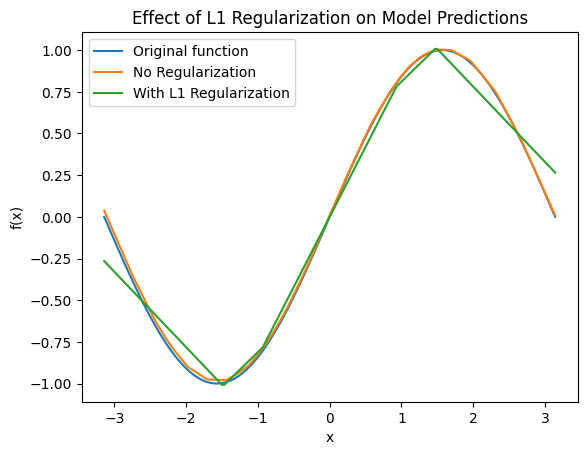

In [13]:
with torch.no_grad():
    predictions_no_reg = model_no_reg(x).detach().numpy()
    predictions_with_reg = model_with_reg(x).detach().numpy()

plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predictions_no_reg, label='No Regularization')
plt.plot(x.numpy(), predictions_with_reg, label='With L1 Regularization')
plt.legend()
plt.title('Effect of L1 Regularization on Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


## Visualize the contribution of each neuron


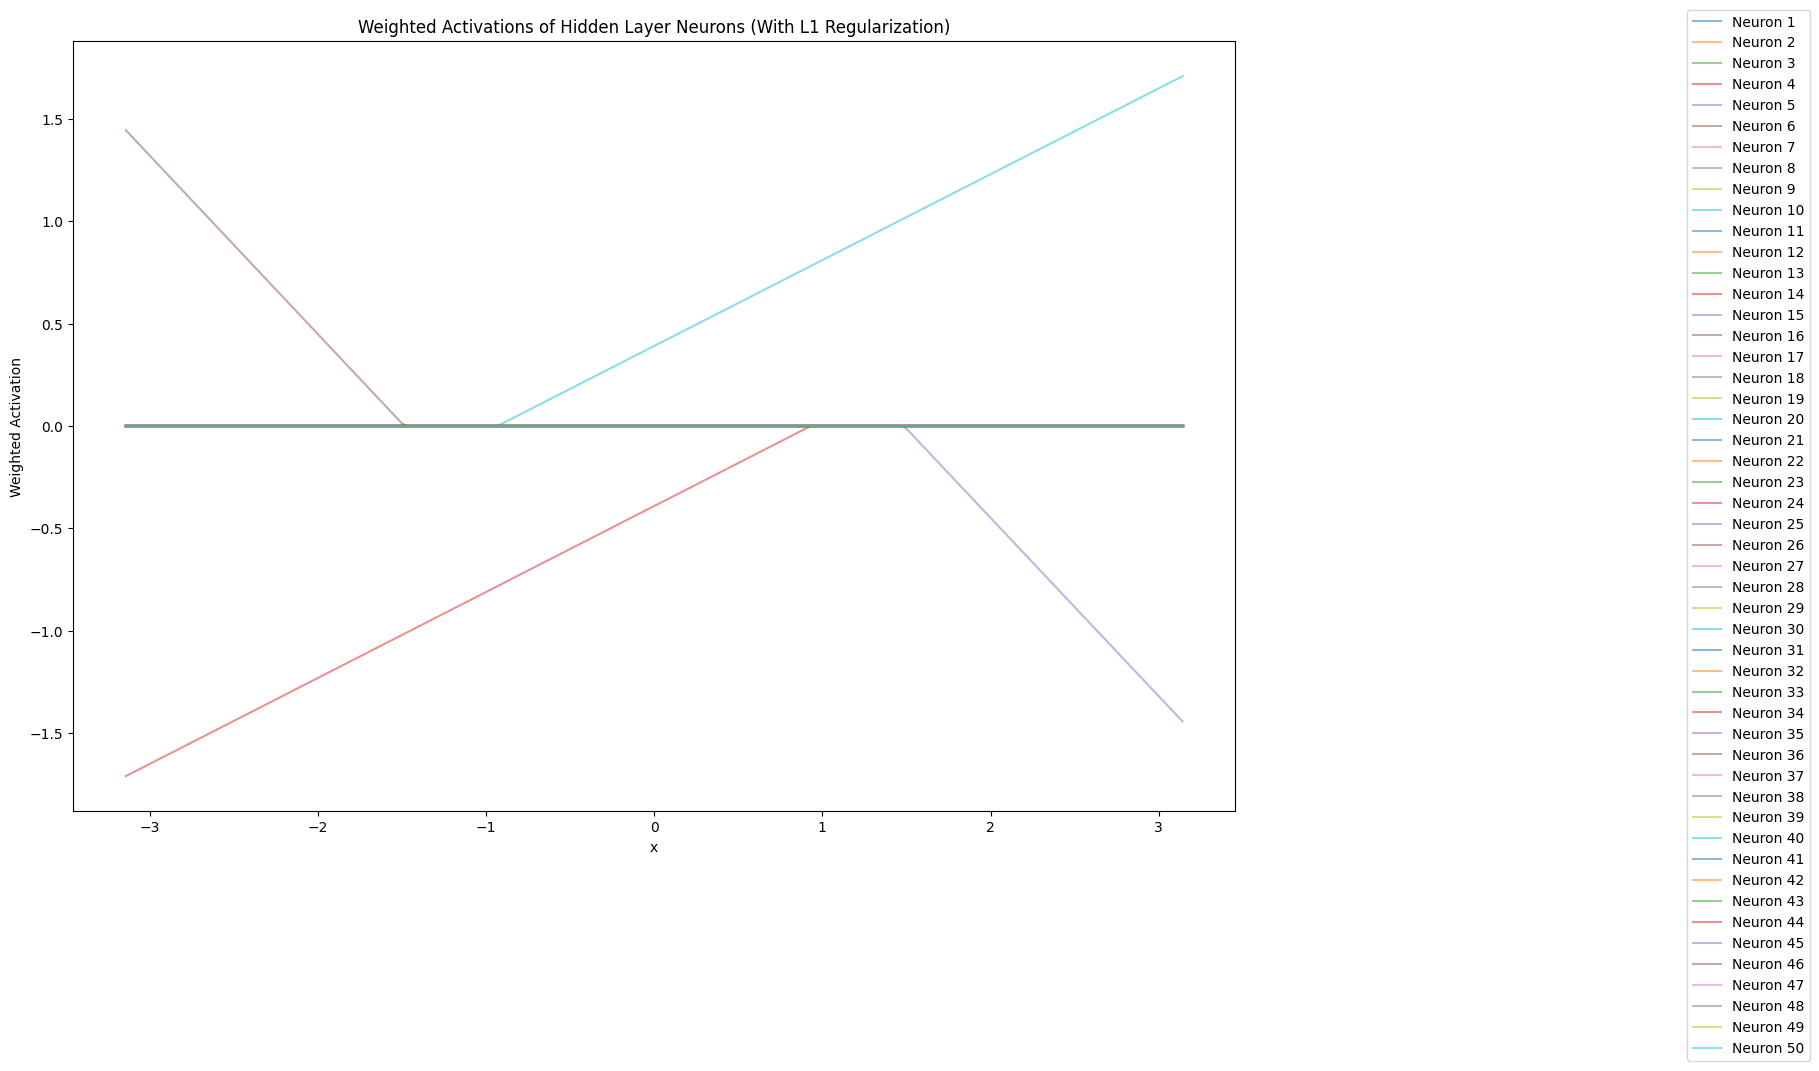

In [14]:
with torch.no_grad():
    _, activations_with_reg = model_with_reg.forward_with_activations(x)
weights_to_output_reg = model_with_reg.fc2.weight.detach()

# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)

plt.figure(figsize=(15, 10))
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')

plt.title('Weighted Activations of Hidden Layer Neurons (With L1 Regularization)')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.05))
plt.show()


# 실습 과제 3.
Lab 1 Universal Approximation Theorem에서 ReLU이외의 다른 activation function으로 학습시켜보고 결과를 논의하세요.

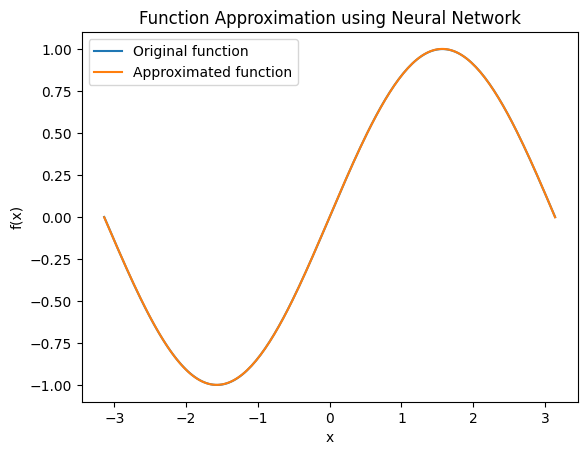

In [15]:
# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y = torch.sin(x)

# Neural network definition
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

# Model instantiation
model = Net(hidden_size=50)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 2000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Results visualization
with torch.no_grad():
    predicted = model(x).detach().numpy()

# Original vs Approximated function plot
plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predicted, label='Approximated function')
plt.legend()
plt.title('Function Approximation using Neural Network')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


## Visualization of Neuron

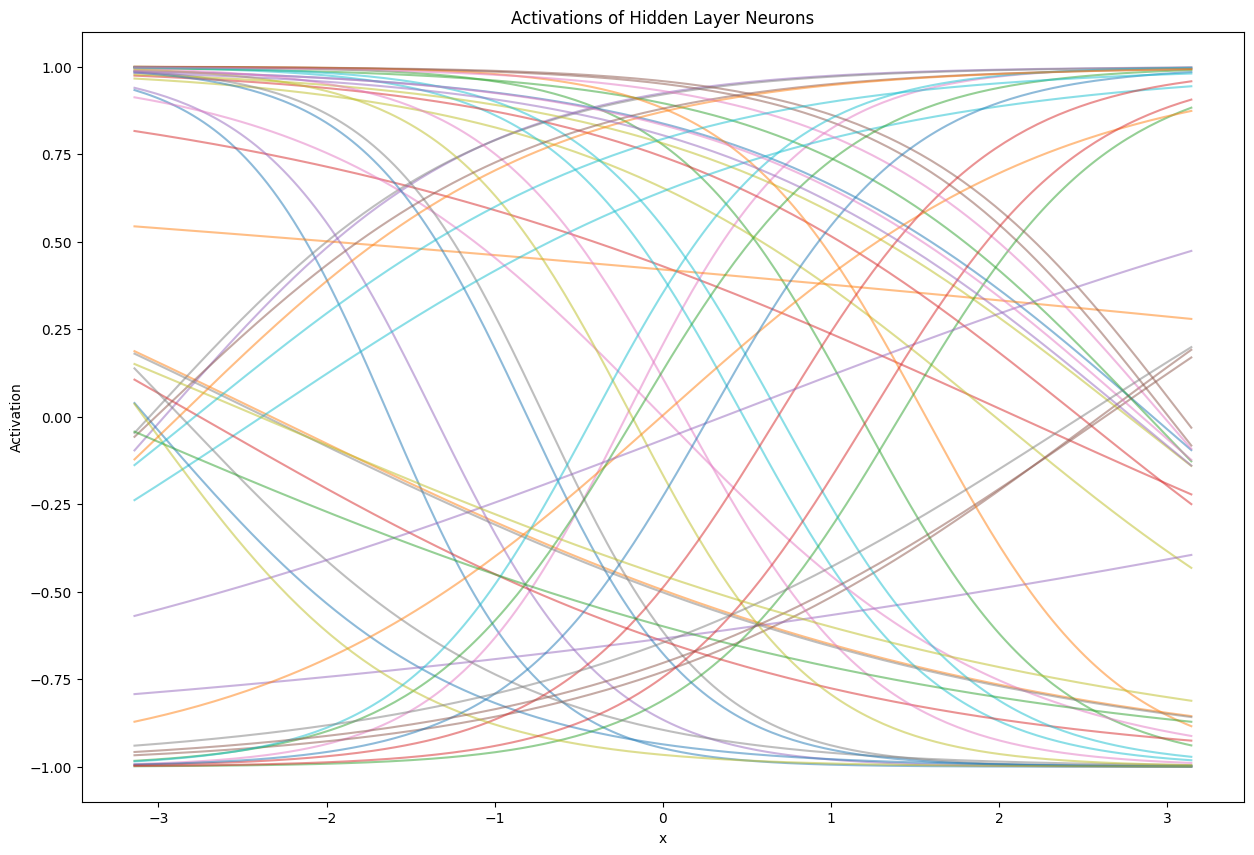

In [16]:
# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.tanh(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

# Training setup
model = Net(hidden_size=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
y = torch.sin(x)
epochs = 2000
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Extract activations
model_with_activations = NetWithActivations(hidden_size=50)
model_with_activations.load_state_dict(model.state_dict())

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

# Visualizing activations
plt.figure(figsize=(15, 10))
for i in range(activations.size(1)):  # For each neuron in the hidden layer
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)

plt.title('Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Activation')
plt.show()


## Visualize the weight times activation

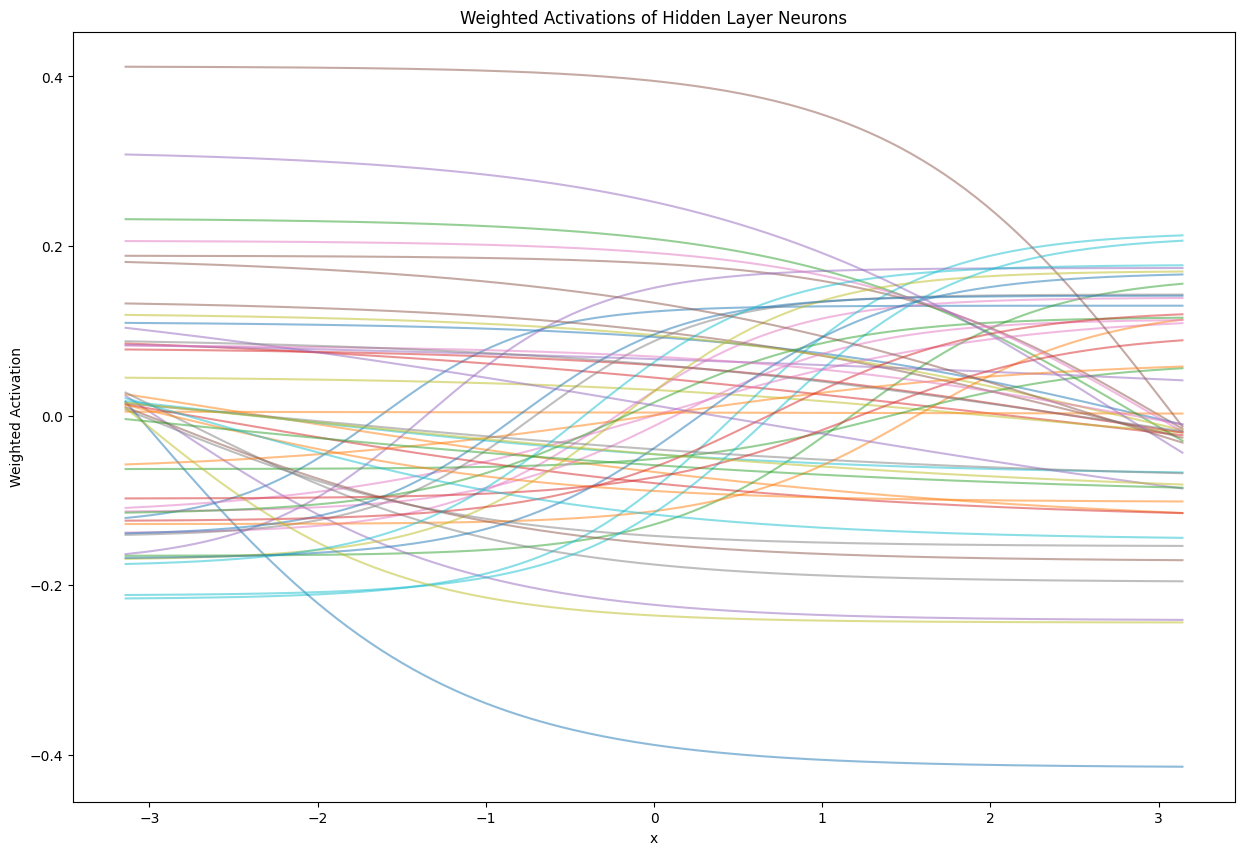

In [17]:
# Assuming model_with_activations is already defined and has the trained weights

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

# Get the weights from the hidden layer to the output
weights_to_output = model_with_activations.fc2.weight.detach()

# Compute weighted activations
weighted_activations = activations * weights_to_output

# Visualizing weighted activations
plt.figure(figsize=(15, 10))
for i in range(weighted_activations.size(1)):
    plt.plot(x.numpy(), weighted_activations[:, i].numpy(), alpha=0.5)

plt.title('Weighted Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.show()


# 실습 과제 4.
Lab 1 ANN for MNIST에서 모델을 hinge loss (SVM loss)로 학습시켜보고 결과를 논의하세요

In [18]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

100%|██████████| 26421880/26421880 [00:00<00:00, 116844250.72it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 9625603.18it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 63025686.17it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6238739.38it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [19]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [20]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.MultiMarginLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [21]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# We also check the model\'s performance against the test dataset to ensure it is learning.
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.914814  [   64/60000]
loss: 0.885618  [ 6464/60000]
loss: 0.868436  [12864/60000]
loss: 0.850284  [19264/60000]
loss: 0.817615  [25664/60000]
loss: 0.792373  [32064/60000]
loss: 0.803388  [38464/60000]
loss: 0.761064  [44864/60000]
loss: 0.785376  [51264/60000]
loss: 0.722643  [57664/60000]
Test Error: 
 Accuracy: 33.8%, Avg loss: 0.702766 

Epoch 2
-------------------------------
loss: 0.750519  [   64/60000]
loss: 0.716936  [ 6464/60000]
loss: 0.648243  [12864/60000]
loss: 0.659725  [19264/60000]
loss: 0.599265  [25664/60000]
loss: 0.535699  [32064/60000]
loss: 0.577316  [38464/60000]
loss: 0.503139  [44864/60000]
loss: 0.512125  [51264/60000]
loss: 0.440496  [57664/60000]
Test Error: 
 Accuracy: 59.4%, Avg loss: 0.446216 

Epoch 3
-------------------------------
loss: 0.492804  [   64/60000]
loss: 0.475404  [ 6464/60000]
loss: 0.387689  [12864/60000]
loss: 0.413457  [19264/60000]
loss: 0.353756  [25664/60000]
loss: 0.344066  [32064/600

모델 저장과 로딩은 결과에 영향을 주지 않기 때문에 따로 진행하지 않았음

# 실습 과제 5.
Lab 1 ANN for MNIST에서 모델을 nn module이 아닌 barebone function만으로 같은 기능을 구현하세요.

In [36]:
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim

class NeuralNetwork:
    def __init__(self, device):
        self.input_size = 28*28
        self.hidden_size = 512
        self.output_size = 10
        self.device = device

        # Initialize weights and biases for linear layers
        self.weight1 = torch.nn.Parameter(torch.Tensor(self.hidden_size, self.input_size).to(device))
        self.bias1 = torch.nn.Parameter(torch.Tensor(self.hidden_size).to(device))
        self.weight2 = torch.nn.Parameter(torch.Tensor(self.hidden_size, self.hidden_size).to(device))
        self.bias2 = torch.nn.Parameter(torch.Tensor(self.hidden_size).to(device))
        self.weight3 = torch.nn.Parameter(torch.Tensor(self.output_size, self.hidden_size).to(device))
        self.bias3 = torch.nn.Parameter(torch.Tensor(self.output_size).to(device))

        # Kaiming initialization for weights
        torch.nn.init.kaiming_uniform_(self.weight1, nonlinearity='relu')
        torch.nn.init.kaiming_uniform_(self.weight2, nonlinearity='relu')
        torch.nn.init.kaiming_uniform_(self.weight3, nonlinearity='relu')

        # Initialize biases to zero
        torch.nn.init.constant_(self.bias1, 0)
        torch.nn.init.constant_(self.bias2, 0)
        torch.nn.init.constant_(self.bias3, 0)

    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = F.relu(F.linear(x, self.weight1, self.bias1))
        x = F.relu(F.linear(x, self.weight2, self.bias2))
        logits = F.linear(x, self.weight3, self.bias3)
        return logits

    def parameters(self):
        return [self.weight1, self.bias1, self.weight2, self.bias2, self.weight3, self.bias3]

# Assuming 'device' is defined elsewhere, e.g.,
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(device=device)

# Download training and test data
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

# Initialize the model, loss function, and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the training and testing loops
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model.forward(X)  # 직접 정의한 forward 메소드를 사용
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()  # Gradient를 0으로 초기화
        loss.backward()  # Gradient 계산
        optimizer.step()  # 파라미터 업데이트

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model.forward(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# Training and testing loops
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.424821  [   64/60000]
loss: 0.528671  [ 6464/60000]
loss: 0.378794  [12864/60000]
loss: 0.463171  [19264/60000]
loss: 0.444100  [25664/60000]
loss: 0.414492  [32064/60000]
loss: 0.358025  [38464/60000]
loss: 0.528525  [44864/60000]
loss: 0.424687  [51264/60000]
loss: 0.489137  [57664/60000]
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.410420 

Epoch 2
-------------------------------
loss: 0.291638  [   64/60000]
loss: 0.313973  [ 6464/60000]
loss: 0.265168  [12864/60000]
loss: 0.350887  [19264/60000]
loss: 0.425737  [25664/60000]
loss: 0.386357  [32064/60000]
loss: 0.325847  [38464/60000]
loss: 0.473099  [44864/60000]
loss: 0.366048  [51264/60000]
loss: 0.385701  [57664/60000]
Test Error: 
 Accuracy: 86.3%, Avg loss: 0.373733 

Epoch 3
-------------------------------
loss: 0.225141  [   64/60000]
loss: 0.369398  [ 6464/60000]
loss: 0.227070  [12864/60000]
loss: 0.301739  [19264/60000]
loss: 0.368982  [25664/60000]
loss: 0.325423  [32064/600

# 실습 과제 6.
다음 x와 w의 matrix multiplication을 수행하고자 할 때, GPU 사용과 CPU 사용시 수행시간을 비교하세요.<br>

x = torch.rand(512, 4096) <br>
w = torch.rand(4096, 4096)

In [26]:
#import time for check running time
import time

#define x and w
x = torch.rand(512, 4096)
w = torch.rand(4096, 4096)

#move to cpu
x = x.to('cpu')
w = w.to('cpu')

# caculate matrix multiplication in cpu
start = time.time()
torch.mm(x,w)
end = time.time()
print('cpu time:', end-start)

#move to gpu
x = x.to('cuda')
w = w.to('cuda')
torch.mm(x,w)

#caculate matrix multiplication in gpu
start = time.time()
torch.mm(x,w)
end = time.time()
print('gpu time:', end-start)

cpu time: 0.1695847511291504
gpu time: 0.000118255615234375


# 실습 과제 7.
수업에서 설명한 Logistic Regression (Linear Classifier)과 ANN으로 각각 CIFAR10 데이터를 학습시키고 이미지와 곱해지는 weight들을 이미지 형태로 시각화 하여 비교하세요

## logistic regression

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.linear_model import LogisticRegression

# CIFAR-10 데이터셋을 로드합니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터를 선형 분류기에 적합한 형태로 전처리합니다.
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
y_train_flat = y_train.ravel()
y_test_flat = y_test.ravel()

# 선형 분류기 모델을 생성하고 훈련합니다.
clf = LogisticRegression(max_iter=1000, tol=0.1, solver='saga', multi_class='ovr')
clf.fit(x_train_flat, y_train_flat)

# 가중치를 시각화합니다.
weights = clf.coef_.reshape(10, 32, 32, 3)

170498071/170498071 [==============================] - 6s 0us/step


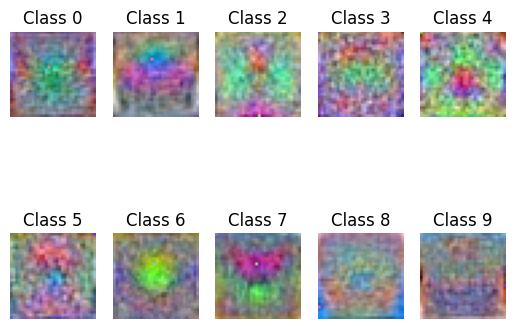

In [28]:
for i, weight in enumerate(weights):
    # Normalize the weights to be between 0 and 1
    normalized_weight = (weight - np.min(weight)) / (np.max(weight) - np.min(weight))

    # Scale the normalized weights to be between 0 and 255
    image_weight = ((normalized_weight + 1) * 255).astype(np.uint8)

    plt.subplot(2, 5, i + 1)
    plt.imshow(image_weight)
    plt.title(f'Class {i}')
    plt.axis('off')
plt.show()

## ANN

In [29]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 12

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:05<00:00, 29447563.56it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [37]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*32*32, 512), # CIFAR 이미지는 32x32 크기이며, 각각 3개의 채널을 가집니다.
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10) # 최종 출력은 클래스 수인 10이 됩니다.
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


# 모델, 손실함수, 옵티마이저 초기화
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

# 훈련 과정
epochs = 10
for epoch in range(epochs):
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, loss.item()))

print('Finished Training')

[1,  2000] loss: 1.657
[1,  4000] loss: 1.479
[2,  2000] loss: 1.443
[2,  4000] loss: 1.729
[3,  2000] loss: 1.943
[3,  4000] loss: 1.392
[4,  2000] loss: 1.298
[4,  4000] loss: 1.765
[5,  2000] loss: 1.741
[5,  4000] loss: 2.015
[6,  2000] loss: 1.164
[6,  4000] loss: 1.849
[7,  2000] loss: 1.245
[7,  4000] loss: 1.438
[8,  2000] loss: 2.067
[8,  4000] loss: 1.210
[9,  2000] loss: 1.944
[9,  4000] loss: 1.152
[10,  2000] loss: 2.035
[10,  4000] loss: 1.579
Finished Training


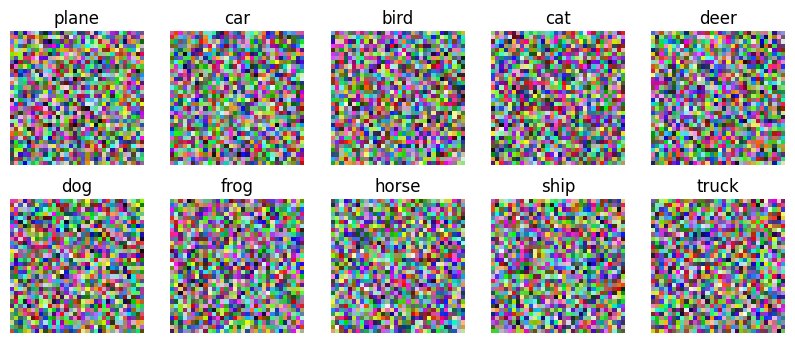

In [41]:
import matplotlib.pyplot as plt
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 데이터 로더가 이미 정의되었다고 가정합니다.
# 예: train_loader, test_loader

# 가중치를 시각화하는 함수
def visualize_weights(layer_weights, classes, num_rows=2, num_cols=5):
    # 가중치를 [0, 1] 범위로 정규화
    min_w = torch.min(layer_weights)
    max_w = torch.max(layer_weights)
    layer_weights = (layer_weights - min_w) / (max_w - min_w)

    # 그리드 설정 및 시각화
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))
    for i, ax in enumerate(axes.flatten()):
        if i >= len(classes): break
        img = layer_weights[i].cpu().data
        img = torchvision.transforms.ToPILImage()(img)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(classes[i])
    plt.show()

# 훈련된 모델의 첫 번째 계층 가중치 가져오기
weights = model.linear_relu_stack[0].weight.data
weights = weights.view(512, 3, 32, 32)  # 이전: (10, 3, 32, 32)

# 이제 이 512개의 필터 중 첫 10개만 시각화하기 위해 선택합니다.
selected_weights = weights[:10]

# CIFAR-10 데이터셋의 클래스 이름
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 선택된 가중치를 시각화합니다.
visualize_weights(selected_weights, classes)